In [1]:
!pip install cognite-sdk
!pip install --upgrade numpy

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.2 which is incompatible.


In [2]:
%matplotlib inline

import os
from datetime import datetime, timedelta
from datetime import datetime
from getpass import getpass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from cognite.client import CogniteClient

In [32]:
c = CogniteClient(api_key=getpass("Open Industrial Data API-KEY: "),
                       project="publicdata", client_name="Tamas Suli")

Open Industrial Data API-KEY: ········


In [33]:
all_timeseries = c.time_series.list(limit=-1).to_pandas()
print(len(all_timeseries))
all_timeseries.head()

408


,id,externalId,name,isString,metadata,assetId,isStep,description,createdTime,lastUpdatedTime,unit
0,6190956317771,pi:160627,VAL_23-PDT-92501:X.Value,False,"{'tag': 'VAL_23-PDT-92501:X.Value', 'scan': '1...",5552927149248373,False,PH 1stStgSuctCool Gas In ESDV,1593024714298,1593512847807,NaN
1,12378169571900,pi:161021,VAL_23-YA-96118-02:Z.X.Value,False,"{'tag': 'VAL_23-YA-96118-02:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear1 Journ BRG NDE,1593024714298,1593512902300,NaN
2,25870989735584,pi:160252,VAL_23-KA-9101-M01_OC_low stage_NOC3low:VALUE,False,{'tag': 'VAL_23-KA-9101-M01_OC_low stage_NOC3l...,6191827428964450,False,PH (SwitchGear) MV-COMP.M. FEEDER/ 51-protecti...,1593024714298,1593512810583,NaN
3,36109712494634,houston.ro.REMOTE_AI[27],FIT85-27,False,"{'PLC': 'ro', 'type': 'Flow Meter', 'P&ID No':...",5429456298475824,False,Flow Rate Permeate Pass 2,1594038832212,1594038977936,gpm
4,52336799167961,pi:160731,VAL_23-PT-96186:Z.X1.Value,False,"{'tag': 'VAL_23-PT-96186:Z.X1.Value', 'scan': ...",4499548129923245,False,PH 1st Stg Oil Header,1593024714298,1593512866556,NaN


In [34]:
c.assets.retrieve(id=2853212781345885).to_pandas()

,value
name,23-ESDV-92501A-PST
parentId,576308321452985
description,SOFT TAG VRD - PH 1STSTGSUCTCLR GAS IN
id,2853212781345885
createdTime,0
lastUpdatedTime,0
rootId,6687602007296940
ELC_STATUS_ID,1211
SOURCE_DB,workmate
SOURCE_TABLE,wmate_dba.wmt_tag


In [35]:
c.datapoints.retrieve(external_id="VAL_45-PT-92508:X.Value", start="10d-ago", end="now").to_pandas().head()

CogniteAPIError: Time series ids not found | code: 400 | X-Request-ID: 411d04bd-ac61-928c-974b-c6c80745bdee
Missing: [{'externalId': 'VAL_45-PT-92508:X.Value'}]

In [36]:
ts_list = c.time_series.list(include_metadata=False)

In [37]:
print(ts_list)

[
    {
        "id": 6190956317771,
        "external_id": "pi:160627",
        "name": "VAL_23-PDT-92501:X.Value",
        "is_string": false,
        "metadata": {
            "tag": "VAL_23-PDT-92501:X.Value",
            "scan": "1",
            "span": "100",
            "step": "0",
            "zero": "0",
            "recno": "145127",
            "excdev": "0",
            "excmax": "600",
            "excmin": "0",
            "exdesc": "",
            "future": "0",
            "compdev": "0",
            "compmax": "28800",
            "compmin": "0",
            "convers": "1",
            "pointid": "160627",
            "srcptid": "0",
            "engunits": "",
            "shutdown": "0",
            "userint1": "0",
            "userint2": "0",
            "archiving": "1",
            "location1": "1",
            "location2": "0",
            "location3": "1",
            "location4": "1",
            "location5": "0",
            "pointtype": "Float32",
         

In [38]:
all_timeseries = c.time_series.list(limit=-1).to_pandas()
print(len(all_timeseries))
all_timeseries[:50]

408


,id,externalId,name,isString,metadata,assetId,isStep,description,createdTime,lastUpdatedTime,unit
0,6190956317771,pi:160627,VAL_23-PDT-92501:X.Value,False,"{'tag': 'VAL_23-PDT-92501:X.Value', 'scan': '1...",5552927149248373,False,PH 1stStgSuctCool Gas In ESDV,1593024714298,1593512847807,NaN
1,12378169571900,pi:161021,VAL_23-YA-96118-02:Z.X.Value,False,"{'tag': 'VAL_23-YA-96118-02:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear1 Journ BRG NDE,1593024714298,1593512902300,NaN
2,25870989735584,pi:160252,VAL_23-KA-9101-M01_OC_low stage_NOC3low:VALUE,False,{'tag': 'VAL_23-KA-9101-M01_OC_low stage_NOC3l...,6191827428964450,False,PH (SwitchGear) MV-COMP.M. FEEDER/ 51-protecti...,1593024714298,1593512810583,NaN
3,36109712494634,houston.ro.REMOTE_AI[27],FIT85-27,False,"{'PLC': 'ro', 'type': 'Flow Meter', 'P&ID No':...",5429456298475824,False,Flow Rate Permeate Pass 2,1594038832212,1594038977936,gpm
4,52336799167961,pi:160731,VAL_23-PT-96186:Z.X1.Value,False,"{'tag': 'VAL_23-PT-96186:Z.X1.Value', 'scan': ...",4499548129923245,False,PH 1st Stg Oil Header,1593024714298,1593512866556,NaN
5,54795035045033,pi:160031,VAL_23_FIC_92543_02:Z.X.Value,False,"{'tag': 'VAL_23_FIC_92543_02:Z.X.Value', 'scan...",7738334214915176,False,PH 1stStgComp AntSrg Act CntrlMod,1593024714298,1593512911434,NaN
6,62243813742212,pi:161024,VAL_23-YA-96120-01:Z.X.Value,False,"{'tag': 'VAL_23-YA-96120-01:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear2 Journ BRG DE,1593024714298,1593512903356,NaN
7,75475333173539,pi:160920,VAL_23-TT-96115-01:Z.X.Value,False,"{'tag': 'VAL_23-TT-96115-01:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear Thrust BRG IN,1593024714298,1593512891075,NaN
8,75873560338797,pi:160574,VAL_23-LY-92529_SILch0_SC0_TYSP:VALUE,False,{'tag': 'VAL_23-LY-92529_SILch0_SC0_TYSP:VALUE...,1081261865374641,False,PH (Profiler) Shutdown Channel 0 - Tube y Setp...,1593024714298,1593512840510,NaN
9,138649441615650,pi:160061,VAL_23_FT_92537_03:Z.X.Value,False,"{'tag': 'VAL_23_FT_92537_03:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStgComp Flow,1593024714298,1593512914895,NaN


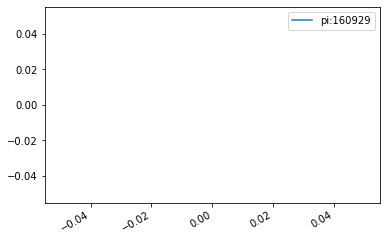

In [39]:
my_time_series = c.time_series.retrieve(id=944003029648139)
my_time_series.plot()